In [ ]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

# Project 2
### Analyzing NYPD calls for service & NYPD arrests

1. Visualize counts of NYPD calls for service during the year of 2023. Look for patterns that calls are concentrated around specific period of time such as holiday seasons.
2. Visualize the relationship between number of services called for vs. number of arrests in different boroughs.

## Part 0: Read the datasets

1. **NYPD Calls for Service**: Calls for Service to NYPD's 911 system. This dataset documents entries into the NYPD 911 system, ICAD. The data is collected from the ICAD system which call takers and dispatchers use to communicate with callers and the NYPD.
    - `CAD_EVNT_ID` is the unique identifier
2. **NYPD Arrests Data**: This is a breakdown of every arrest effected in NYC by the NYPD going back to 2006 through the end of the previous calendar year.(For this project, I queried onlly 2023 data.) This data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning before being posted on the NYPD website. Each record represents an arrest effected in NYC by the NYPD and includes information about the type of crime, the location and time of enforcement.



In [238]:
# import packages

import pandas as pd
import plotly.express as px

In [239]:

# calls
calls = pd.read_csv("NYPD_Calls_for_Service.csv")
# arrests 
arrests = pd.read_csv("NYPD_Arrests_Data.csv")

**For the convenience of merging two datasets, create a column `boro` in two datasets for the borough information:** 
- `boro`: bronx, queens, manhattan, brooklyn, state island.

In [240]:
calls["boro"] = calls["BORO_NM"].str.lower()

location_mapping = {
    'K': 'brooklyn',
    'M': 'manhattan',
    'B': 'bronx',
    'Q': 'queens',
    'S': 'staten island'
}

arrests['boro'] = arrests['ARREST_BORO'].map(location_mapping)

## Part 1: Seperately explore & visualize two datasets

### What time of the year does the NYPD receive the most calls?

#### Calls vs. Date

In [242]:
## counts of NYPD calls vs. date

df1 = calls[['CAD_EVNT_ID', 'INCIDENT_DATE', 'boro','TYP_DESC']].copy()
df1['INCIDENT_DATE'] = pd.to_datetime(df1["INCIDENT_DATE"], format="%m/%d/%Y")


In [243]:
# group by date and count for incidents
counts_date = df1.groupby(pd.Grouper(key="INCIDENT_DATE", freq="D")).size().to_frame(name="counts")

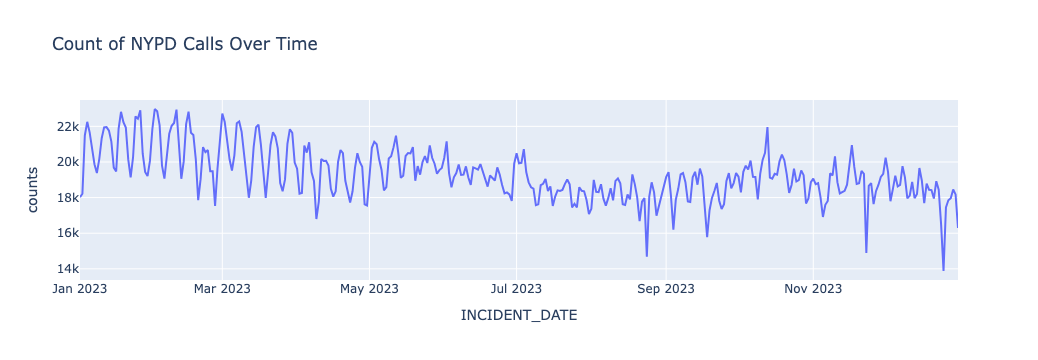

In [244]:
# plot: counts vs. date

px.line(counts_date,
            y = 'counts',
            title = 'Count of NYPD Calls Over Time',
            labels = {'x':'Date'})

**The plot above shows** 
- The number of calls varied significantly acrosss date. Generally, less calls during the summertime, and more calls in January to March. This is not a clear way to see the pattern, so I would now try to visualize the calls by month.

#### Calls vs. Month

In [245]:
counts_month = df1.groupby(pd.Grouper(key="INCIDENT_DATE", freq="m")).size().to_frame(name="counts").reset_index()

/var/folders/s1/pdxc_x2s16507rp9qhbl828c0000gn/T/ipykernel_438/583423294.py:1: FutureWarning:

'm' is deprecated and will be removed in a future version, please use 'ME' instead.



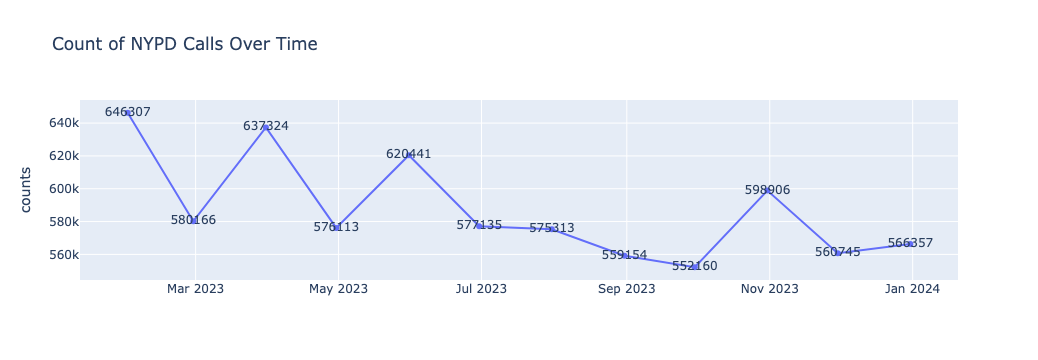

In [246]:
# Plot
fig = px.line(counts_month, 
              x = 'INCIDENT_DATE', 
              y = 'counts', 
              text='counts', 
              title = 'Count of NYPD Calls Over Time')
fig.update_layout( 
    xaxis_title="")

fig.show()

**The plot above shows:**
- NYPD calls concentrated in Feburary, April, Jun, and November. The lowest number are observed in September, October

#### Calls vs. Date with Borough

In [247]:
counts_date_boro = df1.groupby([pd.Grouper(key="INCIDENT_DATE", freq="D"),'boro']).size().to_frame(name="counts").reset_index()

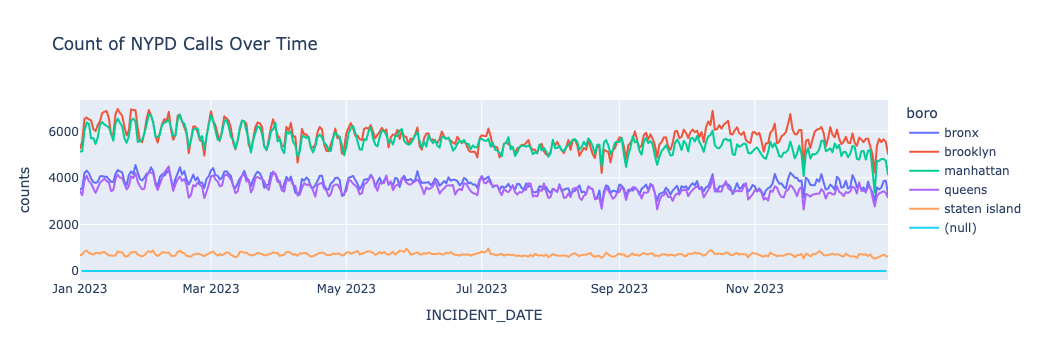

In [248]:
# plot: counts vs. date, colored by boro

fig = px.line(counts_date_boro,
            x = 'INCIDENT_DATE',
            y = 'counts',
            title = 'Count of NYPD Calls Over Time', 
            color = 'boro',
            labels = {'x':'Date'})
fig.show()

**The above plot shows:**
- Brooklyn and Manhattan have more NYPD calls, bronx and queens have similar number of NYPD calls, and state island has the least number of NYPD calls. This makes sense if we think about the population in these districts.

### Explore the arrests data

In [250]:
df2 = arrests[['ARREST_KEY', 'ARREST_DATE', 'AGE_GROUP','PERP_SEX', 'PERP_RACE', 'boro']].copy()
df2['ARREST_DATE'] = pd.to_datetime(df2["ARREST_DATE"], format="%m/%d/%Y")

#### Arrests vs. Date

In [252]:
# group by date and count for incidents
counts_arrest_date = df2.groupby(pd.Grouper(key="ARREST_DATE", freq="D")).size().to_frame(name="counts")

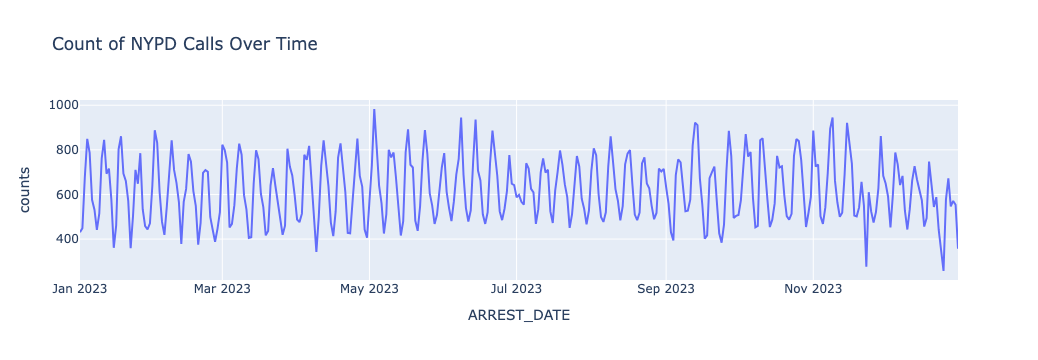

In [254]:
# plot: counts vs. date

px.line(counts_arrest_date,
            y = 'counts',
            title = 'Count of NYPD Calls Over Time',
            labels = {'x':'Date'})

#### Arrests vs. Month

In [255]:
counts_arrest_month = df2.groupby(pd.Grouper(key="ARREST_DATE", freq="m")).size().to_frame(name="counts").reset_index()

/var/folders/s1/pdxc_x2s16507rp9qhbl828c0000gn/T/ipykernel_438/1324899489.py:1: FutureWarning:

'm' is deprecated and will be removed in a future version, please use 'ME' instead.



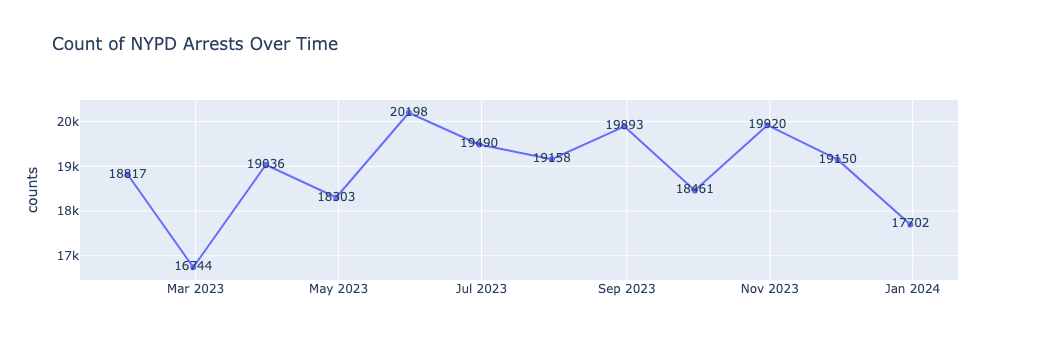

In [256]:
# Plot
fig = px.line(counts_arrest_month, 
              x = 'ARREST_DATE', 
              y = 'counts', 
              text='counts', 
              title = 'Count of NYPD Arrests Over Time')
fig.update_layout( 
    xaxis_title="")

fig.show()

#### Race

In [259]:
counts_arrest_date_race = df2.groupby(
    [pd.Grouper(key="ARREST_DATE", freq="m"),'PERP_RACE']).size().to_frame(name="counts").reset_index()

/var/folders/s1/pdxc_x2s16507rp9qhbl828c0000gn/T/ipykernel_438/2423666306.py:2: FutureWarning:

'm' is deprecated and will be removed in a future version, please use 'ME' instead.



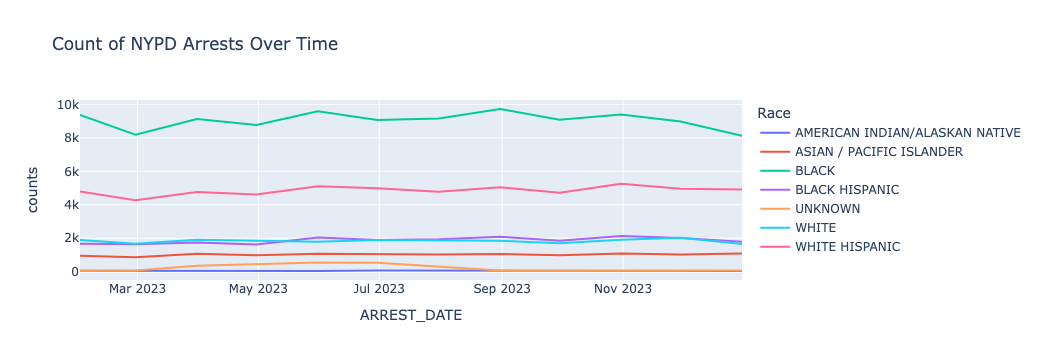

In [261]:
# plot: counts vs. date, colored by boro

fig = px.line(counts_arrest_date_race,
            x = 'ARREST_DATE',
            y = 'counts',
            title = 'Count of NYPD Arrests Over Time', 
            color = 'PERP_RACE',
            labels = {'x':'Date', 'PERP_RACE':"Race"})
fig.show()

### Part 2: Explore & visualize the interaction of two datasets

#### Arrests / Calls Ratio

In [262]:
counts_2023_calls = df1.groupby('boro').size().to_frame(name="calls_counts").reset_index()
counts_2023_arrests = df2.groupby('boro').size().to_frame(name="arrests_counts").reset_index()
df3 = counts_2023_arrests.merge(counts_2023_calls, on = 'boro', how = 'inner')
ratio_2023=df3.copy()
ratio_2023['arrest_call_ratio'] = ratio_2023['arrests_counts']/ratio_2023['calls_counts']

In [263]:
ratio_2023

,boro,arrests_counts,calls_counts,arrest_call_ratio
0,bronx,53258,1372402,0.038806
1,brooklyn,62395,2102586,0.029675
2,manhattan,52891,2013577,0.026267
3,queens,48310,1298977,0.037191
4,staten island,10018,262426,0.038175


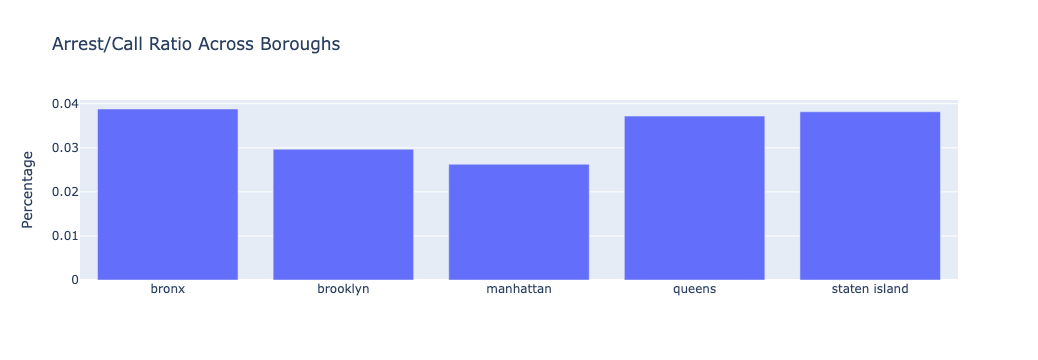

In [264]:
fig = px.bar(ratio_2023, 
              x = 'boro', 
              y = 'arrest_call_ratio', 
              title = 'Arrest/Call Ratio Across Boroughs', 
            labels={'arrest_call_ratio': "Percentage", 'boro': ""})

fig.show()

**The above plot shows**:
- Manhattan has the lowest arrests-to-calls ratio, which could suggest potential differences in policing practices or the nature of incidents compared to other boroughs.